#**Lab Assignment No 2: Hybrid Images**

In [0]:
#Code Belongs to RAJAT KHANNA (2017UCS0050)
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from matplotlib.image import imread
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
import PIL
from PIL import Image
import numpy as np
import cv2

In [0]:
#LINKING COLAB TO DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Generate hybrid color images using the best set of filters obtained for spatial and
frequency domain using color images.*

*You have to do the following operations
initially for generating hybrid using two grayscale images:*

In [0]:
#Importing Images
cat = "/content/drive/My Drive/cat.bmp"
dog = "/content/drive/My Drive/dog.bmp"

In [0]:
catImage = imread(cat)
dogImage = imread(dog)

#Resizing Image
catImage = cv2.resize(catImage, (0, 0), fx=0.7, fy=0.7)
dogImage = cv2.resize(dogImage, (0, 0), fx=0.7, fy=0.7)

#Converting them to GrayscaleImage
dogImageGray = cv2.cvtColor(dogImage, cv2.COLOR_BGR2GRAY)
catImageGray = cv2.cvtColor(catImage, cv2.COLOR_BGR2GRAY)

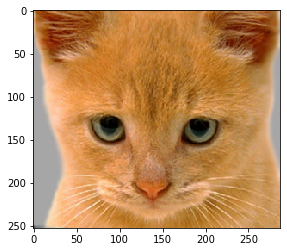

In [0]:
plt.imshow(catImage)

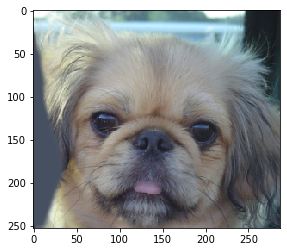

In [0]:
plt.imshow(dogImage)

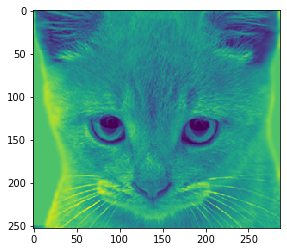

In [0]:
plt.imshow(catImageGray)

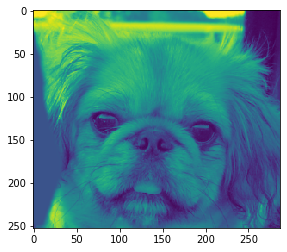

In [0]:
plt.imshow(dogImageGray)

In [0]:
#For colored Images
def myFilter(image, filter):
  assert filter.shape[0] % 2 == 1
  assert filter.shape[1] % 2 == 1

  m = image.shape[0]
  n = image.shape[1]
  c = image.shape[2]

  filtered_image = np.zeros((m,n,c))
  padded_image = np.zeros((m + filter.shape[0] - 1, n + filter.shape[1] -1 ,c))

  p0 = padded_image.shape[0]
  p1 = padded_image.shape[1]

  f0 = filter.shape[0]//2 
  f1 = filter.shape[1]//2
  padded_image[f0 : p0-f0, f1 : p1-f1 , : ] = image
 	
  for a in range(0,c):
    for i in range(0,m):
      for j in range(0,n): 
        x = np.multiply(padded_image[i : i+filter.shape[0],j:j+filter.shape[1],a],filter)
        filtered_image[i,j,a] =  x.sum()

  return filtered_image

#For GrayScale Images
def myFilterGray(image, kernel):
    (iH, iW) = image.shape[0],image.shape[1]
    (kH, kW) = kernel.shape[0],kernel.shape[1]
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            k = (roi * kernel).sum()
            output[y - pad, x - pad] = k  
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    return output

*(a) Generate hybrid images in using spatial filtering techniques. You are required to show
the experiments done using simple filters (also vary their parameters like mask size) and
results obtained for each of them. Make a note of your observations.*

## **USING SPATIAL FILTERS FOR HYBRID IMAGES**

### **Averaging Filters/Box Filters**

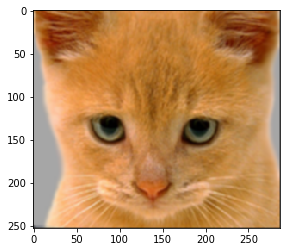

In [0]:
Avg_filter1 = np.ones((3, 3))
Avg_filter1 /= np.sum(Avg_filter1)  # making the filter sum to 1

Avg_filter2 = np.ones((5, 5))
Avg_filter2 /= np.sum(Avg_filter2)  # making the filter sum to 1

Avg_filter3 = np.ones((9, 9))
Avg_filter3 /= np.sum(Avg_filter3)  # making the filter sum to 1

blur_image1 = myFilter(catImage, Avg_filter1)
plt.imshow(blur_image1.astype('uint8'))

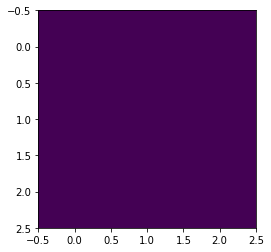

In [0]:
#Outputting Filter
plt.figure(figsize=(4,4)); plt.imshow(Avg_filter1);

In [0]:
#For Colored Images
LowCatImageFil1 = myFilter(catImage,Avg_filter1)
LowCatImageFil2 = myFilter(catImage,Avg_filter2)
LowCatImageFil3 = myFilter(catImage,Avg_filter3)

HighCatImageFil1 = catImage - LowCatImageFil1
HighCatImageFil2 = catImage - LowCatImageFil2
HighCatImageFil3 = catImage - LowCatImageFil3

LowDogImageFil1 = myFilter(dogImage,Avg_filter1)
LowDogImageFil2 = myFilter(dogImage,Avg_filter2)
LowDogImageFil3 = cv2.filter2D(dogImage,-1,Avg_filter3)  #Using Inbuilt ConvolationFilter

HighDogImageFil1 = dogImage - LowDogImageFil1
HighDogImageFil2 = dogImage - LowDogImageFil2
HighDogImageFil3 = dogImage - LowDogImageFil3

In [0]:
#Some Possible Hybrid Images

HybridImage1 = HighCatImageFil1 + LowDogImageFil1
HybridImage2 = HighCatImageFil2 + LowDogImageFil2
HybridImage3 = HighDogImageFil1 + LowCatImageFil1
HybridImage4 = HighDogImageFil2 + LowCatImageFil2
HybridImage5 = HighDogImageFil3 + LowCatImageFil3

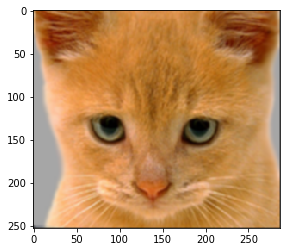

In [0]:
plt.imshow(LowCatImageFil1.astype('uint8'))

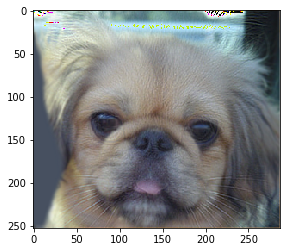

In [0]:
plt.imshow(HybridImage1.astype('uint8'))

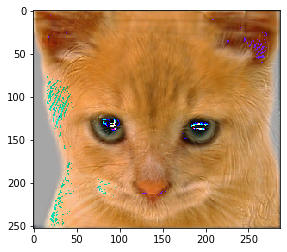

In [0]:
plt.imshow(HybridImage4.astype('uint8'))

In [0]:
#For GrayScaleImages Images
LowCatImageFilGray1 = myFilterGray(catImageGray,Avg_filter1)
LowCatImageFilGray2 = myFilterGray(catImageGray,Avg_filter2)
LowCatImageFilGray3 = myFilterGray(catImageGray,Avg_filter3)

HighCatImageFilGray1 = catImageGray - LowCatImageFilGray1
HighCatImageFilGray2 = catImageGray - LowCatImageFilGray2
HighCatImageFilGray3 = catImageGray - LowCatImageFilGray3


LowDogImageFilGray1 = myFilterGray(dogImageGray,Avg_filter1)
LowDogImageFilGray2 = myFilterGray(dogImageGray,Avg_filter2)
LowDogImageFilGray3 = cv2.filter2D(dogImageGray,-1,Avg_filter3)


HighDogImageGrayFil1 = dogImageGray - LowDogImageFilGray1
HighDogImageGrayFil2 = dogImageGray - LowDogImageFilGray2
HighDogImageGrayFil3 = dogImageGray - LowDogImageFilGray3


In [0]:
HybridImageGray1 = HighCatImageFilGray1 + LowDogImageFilGray1
HybridImageGray2 = HighCatImageFilGray2 + LowDogImageFilGray2
HybridImageGray3 = HighDogImageGrayFil1 + LowCatImageFilGray1
HybridImageGray4 = HighDogImageGrayFil2 + LowCatImageFilGray2
HybridImageGray5 = HighDogImageGrayFil3 + LowCatImageFilGray3

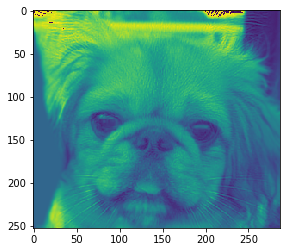

In [0]:
plt.imshow(HybridImageGray1.astype('uint8'))

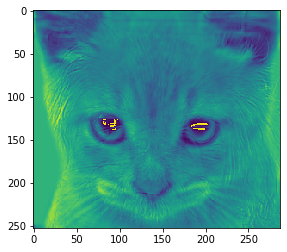

In [0]:
plt.imshow(HybridImageGray4.astype('uint8'))

### **SHARPENING** **FILTERS**

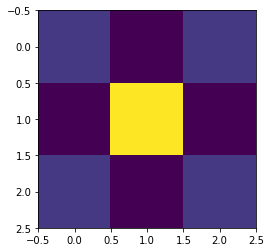

In [0]:
sharpeningFilter1 = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]), dtype="int")
#Outputting Filter
plt.figure(figsize=(4,4)); plt.imshow(sharpeningFilter1);

In [0]:
# For colored Images
lowSharpenedCatImage = myFilter(catImage,sharpeningFilter1)
lowSharpenedDogImage = myFilter(dogImage,sharpeningFilter1)
highSharpenedDogImage = dogImage - lowSharpenedDogImage
highSharpenedCatImage = catImage - lowSharpenedCatImage

sharpedImg1 = lowSharpenedCatImage + highSharpenedDogImage
sharpedImg2 = lowSharpenedDogImage + highSharpenedCatImage

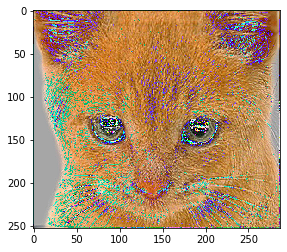

In [0]:
plt.imshow(sharpedImg1.astype('uint8'))

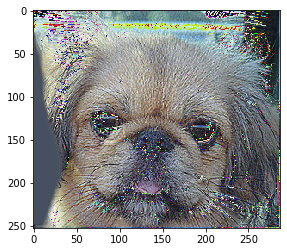

In [0]:
plt.imshow(sharpedImg2.astype('uint8'))

In [0]:
# For GrayScale Images
lowSharpenedCatImageGray = myFilterGray(catImageGray,sharpeningFilter1)
lowSharpenedDogImageGray = myFilterGray(dogImageGray,sharpeningFilter1)
highSharpenedDogImageGray = dogImageGray - lowSharpenedDogImageGray
highSharpenedCatImageGray = catImageGray - lowSharpenedCatImageGray

sharpedImgGray1 = lowSharpenedCatImageGray + highSharpenedDogImageGray
sharpedImgGray2 = lowSharpenedDogImageGray + highSharpenedCatImageGray

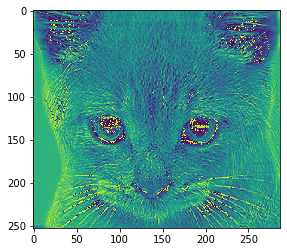

In [0]:
plt.imshow(sharpedImgGray1.astype('uint8'))

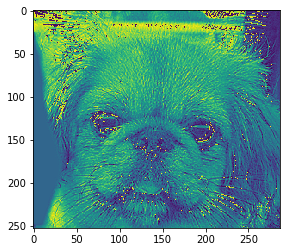

In [0]:
plt.imshow(sharpedImgGray2.astype('uint8'))

### **WEIGHTED FILTERS**

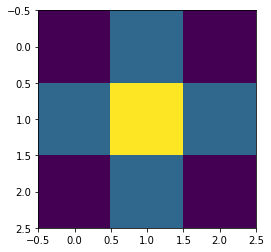

In [0]:
weightedFilter1 = np.array(([1/16, 2/16, 1/16],[2/16, 4/16, 2/16],[1/16, 2/16, 1/16]), dtype="float")
#Outputting Filter
plt.figure(figsize=(4,4)); plt.imshow(weightedFilter1);

In [0]:
#For colored Images
lowCatImage = myFilter(catImage,weightedFilter1)
highCatImage = catImage - lowCatImage
lowDogImage = myFilter(dogImage,weightedFilter1)
highDogImage = dogImage - lowDogImage

weightedImage1 = lowDogImage + highCatImage
weightedImage2 = lowCatImage + highDogImage

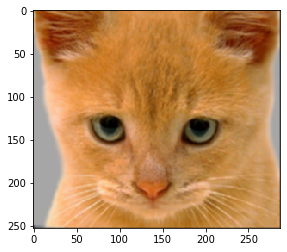

In [0]:
plt.imshow(lowCatImage.astype('uint8'))

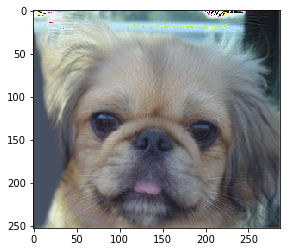

In [0]:
plt.imshow(weightedImage1.astype('uint8'))

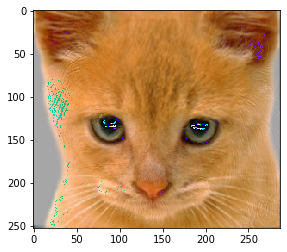

In [0]:
plt.imshow(weightedImage2.astype('uint8'))

In [0]:
#For Grayscale Images
lowCatImageGray = myFilterGray(catImageGray,weightedFilter1)
highCatImageGray = catImageGray - lowCatImageGray
lowDogImageGray = myFilterGray(dogImageGray,weightedFilter1)
highDogImageGray = dogImageGray - lowDogImageGray

weightedImageGray1 = lowDogImageGray + highCatImageGray
weightedImageGray2 = lowCatImageGray + highDogImageGray

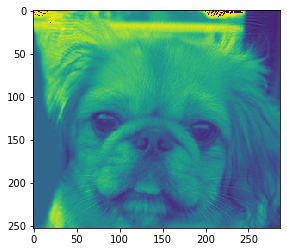

In [0]:
plt.imshow(weightedImageGray1.astype('uint8'))

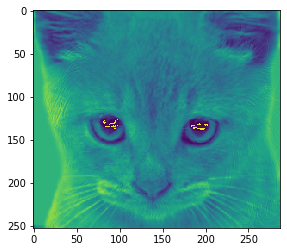

In [0]:
plt.imshow(weightedImageGray2.astype('uint8'))

*(b) Use Gaussain Filters to perform image smoothing. Note the variations by changing the
filter size, and for the images.*

##**GAUSSIAN FILTERS FOR IMAGE SMOOTHNING**





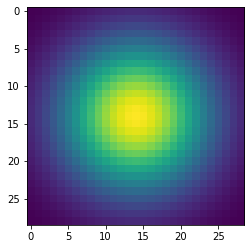

In [0]:
#INBUILT GAUSSIAN FUNCTION
cutoff_frequency = 7
filterinbuiltgaussian = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filterinbuiltgaussian = np.dot(filterinbuiltgaussian, filterinbuiltgaussian.T)

#Outputting Filter
plt.figure(figsize=(4,4)); plt.imshow(filterinbuiltgaussian);


#Self Implemented Gaussian Function
def gaussian_filter(sigma):
    size = 8 * sigma 
    if not size % 2:
        size = size + 1

    center = size // 2
    kernel = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            diff = (i - center) ** 2 + (j - center) ** 2
            kernel[i, j] = np.exp(-diff / (2 * sigma ** 2))

    kernel = kernel / np.sum(kernel)
    return kernel

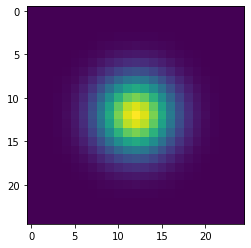

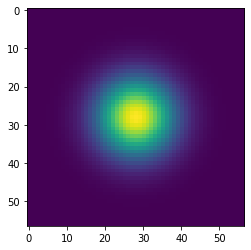

In [0]:
guassFilter1 = gaussian_filter(3)
guassFilter2 = gaussian_filter(7)

#Outputting Filters
plt.figure(figsize=(4,4)); plt.imshow(guassFilter1);
plt.figure(figsize=(4,4)); plt.imshow(guassFilter2);

In [0]:
#For Colored Images
lowGuasscatImg1 = myFilter(catImage, guassFilter1)
lowGuasscatImg2 = myFilter(catImage, guassFilter2)

highGuasscatImg1 = catImage - lowGuasscatImg1
highGuasscatImg2 = catImage - lowGuasscatImg2

lowGuassdogImg1 = myFilter(dogImage, guassFilter1)
lowGuassdogImg2 = myFilter(dogImage, guassFilter2)

highGuassdogImg1 = dogImage - lowGuassdogImg1
highGuassdogImg2 = dogImage - lowGuassdogImg2

guassImg1 = lowGuasscatImg1 + highGuassdogImg1
guassImg2 = lowGuasscatImg2 + highGuassdogImg2
guassImg3 = lowGuassdogImg1 + highGuasscatImg1
guassImg4 = lowGuassdogImg2 + highGuasscatImg2

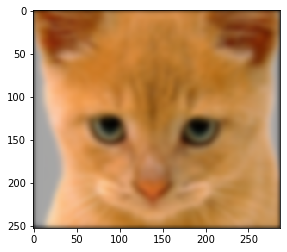

In [0]:
plt.imshow(lowGuasscatImg1.astype('uint8'))

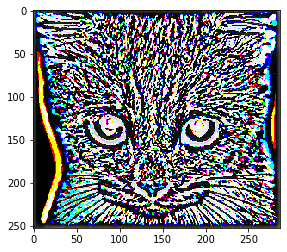

In [0]:
plt.imshow(highGuasscatImg1.astype('uint8'))

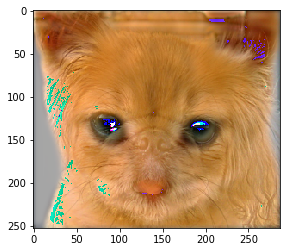

In [0]:
plt.imshow(guassImg1.astype('uint8'))

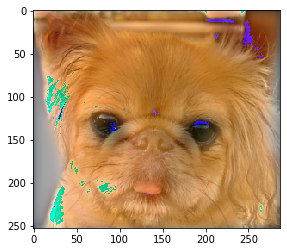

In [0]:
plt.imshow(guassImg2.astype('uint8'))

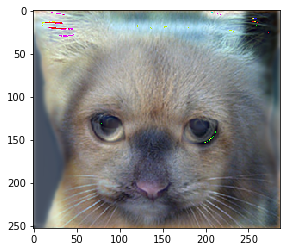

In [0]:
plt.imshow(guassImg3.astype('uint8'))

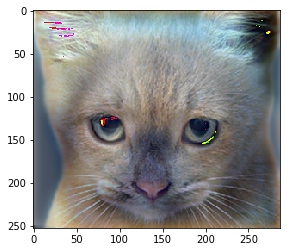

In [0]:
plt.imshow(guassImg4.astype('uint8'))

*(c) Study and make use of Gaussain Pyramids and Laplacian Pyramids for mixing the two
images.*

*(d) Implement Laplacian Pyramids with Bilateral filters and use with Gaussain Pyramids..*

## **GAUSSIAN AND LAPLACIAN PYRAMIDS**

In [0]:
#Genarating Gaussian Pyramids For
#Using 6 layers in pyramid

# Generate Gaussian pyramid for catImage
Tempcat = catImage.copy()
gpcatImage = [Tempcat]
for i in range(6):
    Tempcat = cv2.pyrDown(gpcatImage[i])
    gpcatImage.append(Tempcat)

# generate Gaussian pyramid for dogImage
Tempdog = dogImage.copy()
gpdogImage = [Tempdog]
for i in range(6):
    Tempdog = cv2.pyrDown(gpdogImage[i])
    gpdogImage.append(Tempdog)

In [0]:
#Genarating Laplacian Filters uisng gaussian filters

# generate Laplacian Pyramid for WonderWoman
lpcatImage = [gpcatImage[5]]
for i in range(5,0,-1):
    size = (gpcatImage[i-1].shape[1], gpcatImage[i-1].shape[0])
    GE = cv2.pyrUp(gpcatImage[i], dstsize = size)
    L = cv2.subtract(gpcatImage[i-1],GE)
    lpcatImage.append(L)

# generate Laplacian Pyramid for BlackWidow
lpdogImage = [gpdogImage[5]]
for i in range(5,0,-1):
    size = (gpdogImage[i-1].shape[1], gpdogImage[i-1].shape[0])
    GE = cv2.pyrUp(gpdogImage[i], dstsize = size)
    L = cv2.subtract(gpdogImage[i-1],GE)
    lpdogImage.append(L)

In [0]:
LS = []
for la,lb in zip(lpcatImage,lpdogImage):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)

ls_ = LS[0]
for i in range(1,6):
    size = (LS[i].shape[1], LS[i].shape[0])
    ls_ = cv2.pyrUp(ls_, dstsize = size)
    ls_ = cv2.add(ls_, LS[i])

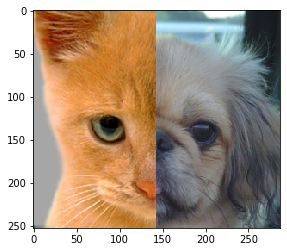

In [0]:
# image with direct connecting each half
real = np.hstack((catImage[:,:cols//2],dogImage[:,cols//2:]))
plt.imshow(real.astype('uint8'))

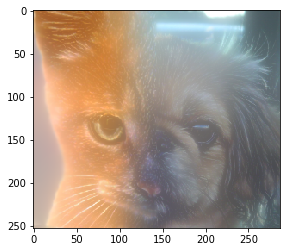

In [0]:
plt.imshow(ls_.astype('uint8'))

*(e) Design a way to do the same mixing in frequency domain.*

##**Mixing in Frequency Domain**

[DFT Blog](https://github.com/abidrahmank/OpenCV2-Python-Tutorials/blob/master/source/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.rst)

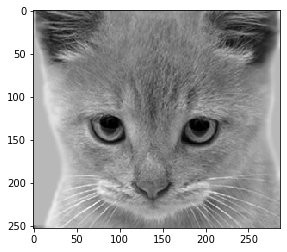

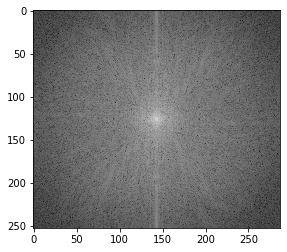

In [0]:
#DFT for CatImage
dftCat = cv2.dft(np.float32(catImageGray),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShiftCat = np.fft.fftshift(dftCat)

SpectrumCat = 20*np.log(cv2.magnitude(dftShiftCat[:,:,0],dftShiftCat[:,:,1]))

plt.figure();plt.imshow(catImageGray, cmap = 'gray');
plt.figure();plt.imshow(SpectrumCat, cmap = 'gray');

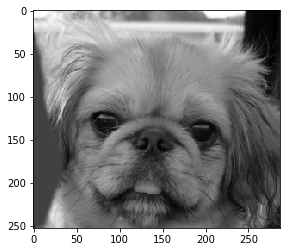

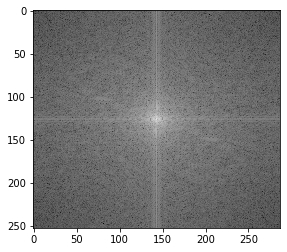

In [0]:
#DFT for dogImage
dftDog = cv2.dft(np.float32(dogImageGray),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShiftDog = np.fft.fftshift(dftDog)

SpectrumDog = 20*np.log(cv2.magnitude(dftShiftDog[:,:,0],dftShiftDog[:,:,1]))

plt.figure();plt.imshow(dogImageGray, cmap = 'gray');
plt.figure();plt.imshow(SpectrumDog, cmap = 'gray');

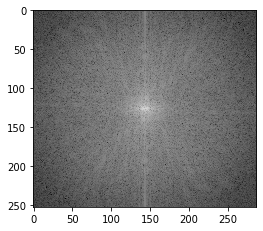

In [0]:
dftFinal = dftShiftCat

for i in range(105,145):
  for j in range(123,166):
    for k in range(0,2):
      dftFinal[i][j][k] = dftShiftDog[i][j][k]

SpectrumFinal = 20*np.log(cv2.magnitude(dftFinal[:,:,0],dftFinal[:,:,1]))
plt.figure(figsize=(4,4)); plt.imshow(SpectrumFinal,cmap='gray')

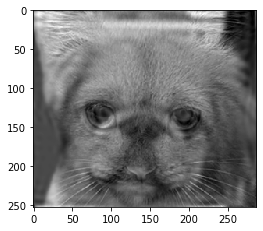

In [0]:
InverseShiftFinal = np.fft.ifftshift(dftFinal)
FinalImage = cv2.idft(InverseShiftFinal)
imgFinalImage_back = cv2.magnitude(FinalImage[:,:,0],FinalImage[:,:,1])
plt.figure(figsize=(4,4)); plt.imshow(FinalImage,cmap='gray')